In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pollution = pd.read_csv(
    'https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011)/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011).csv'
)

In [4]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 4 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        331 non-null    object 
 1   Year                                                          331 non-null    int64  
 2   Smoke (Fouquet and DPCC (2011))                               301 non-null    float64
 3   Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))  331 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 10.5+ KB


In [5]:
pollution.columns

Index(['Entity', 'Year', 'Smoke (Fouquet and DPCC (2011))',
       'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))'],
      dtype='object')

In [6]:
pollution = pollution.rename(
    columns={
        'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))': 'SPM',
        'Smoke (Fouquet and DPCC (2011))' : 'Smoke',
        'Entity': 'City'
    }
)

In [7]:
pollution.dtypes

City      object
Year       int64
Smoke    float64
SPM      float64
dtype: object

In [8]:
pollution

City  Year  Smoke    SPM
0     Delhi  1997    NaN  363.0
1     Delhi  1998    NaN  378.0
2     Delhi  1999    NaN  375.0
3     Delhi  2000    NaN  431.0
4     Delhi  2001    NaN  382.0
..      ...   ...    ...    ...
326  London  2012    NaN   17.0
327  London  2013    NaN   17.0
328  London  2014    NaN   17.0
329  London  2015    NaN   15.0
330  London  2016    NaN   16.0

[331 rows x 4 columns]

In [9]:
pollution.City.unique()

array(['Delhi', 'London'], dtype=object)

In [10]:
pollution.Year.min(), pollution.Year.max()

(1700, 2016)

City, Smoke, and SPM are much clearer names for the variables. We've learned that our dataset covers two cities, London and Delhi, and over a time period between 1700 and 2016

In [12]:
pollution['Year'] = pollution['Year'].apply(
    lambda x: datetime.datetime.strptime(str(x), '%Y')
)

In [13]:
pollution.dtypes

City             object
Year     datetime64[ns]
Smoke           float64
SPM             float64
dtype: object

In [14]:
pollution.head(2)

City       Year  Smoke    SPM
0  Delhi 1997-01-01    NaN  363.0
1  Delhi 1998-01-01    NaN  378.0

In [16]:
pollution.isnull().sum()

City      0
Year      0
Smoke    30
SPM       0
dtype: int64

In [17]:
pollution.isnull().mean()
# smoke variable has 9% of missing values

City     0.000000
Year     0.000000
Smoke    0.090634
SPM      0.000000
dtype: float64

In [19]:
pollution.describe()

Smoke         SPM
count  301.000000  331.000000
mean   210.296440  365.970050
std     88.543288  172.512674
min     13.750000   15.000000
25%    168.571429  288.474026
50%    208.214286  375.324675
75%    291.818182  512.609209
max    342.857143  623.376623

A histogram, first introduced by Karl Pearson, is a count of values within a series of ranges called bins (or buckets). The variable is first divided into a series of intervals, and then all points that fall into each interval are counted (bin counts). We can present these counts visually as a barplot.

Text(0, 0.5, 'Frequency')

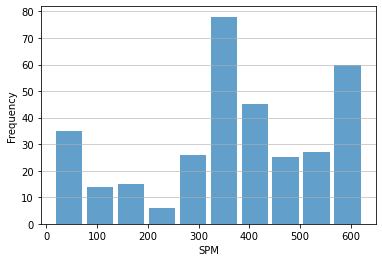

In [22]:
# plotting histogram of SPM variable
n, bins, patches = plt.hist(
    x=pollution['SPM'], bins='auto',
    alpha=0.7, rwidth=0.85
)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('SPM')
plt.ylabel('Frequency')

Historgram can help if you have continuous measurements and want to understand the distribution of values.
Further a histogram can indicate if there are outliers.